# Airbnb Data Analysis Project


This project is about the Airbnb open data from New york city from kaggle, Airbnb is an american company that offers homestays for vacation rentals through their online platforms, this company does not own any of the listed properties, its profit comes from the commision from each booking. Being one of the larger companies in homestay rentals and having the data from one of the most visited cities around the world, I decided to make a deep dive into this dataset to discover insights and key findings. I will be using Python libraries like Pandas for data manipulation, seaborn and matplotlib for visualizations and Kaggle API to download the data from the kaggle website.


### Project Goal:
The overall goal of this data analysis project will be to consolidate and refine the Airbnb data for in-depth analysis, achieving this by improving data completeness through handling missing values, reducing inconsistencies through standardization, and ultimately preparing the data for your specific analysis objectives.


#### Objectives
1. **Analyze price distribution**: create a histogram plot to visualize the distribution of listing prices, to reveal if prices are clustered around a specific range or if there are significant outliers.
2. **Analyze the room type distribution**: use a donut chart to understand the distribution of room types offered across the city.
3. **Compare the price by location**: create a boxplot to compare price differences between neighborhood groups.
4. **Host identity vs review rate**: use a barplot to find if there is a relationship between a verified host and a good rate review.
5. **Price vs minimum nights**: Find a relationship between price and the minimum number of nights allowed by hosts using a scatter plot.

In [59]:
# import libraries needed
import pandas as pd
import pyarrow
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import kaggle

In [ ]:
# download the data from kaggle
!kaggle datasets download -d arianazmoudeh/airbnbopendata

In [20]:
# Unzip the downloaded file
zip = zipfile.ZipFile('airbnbopendata.zip')
zip.extractall()

## Data wrangling
First before beginning to analyze the data, we will do some data wrangling. This consists of phases of exploration, transformation and validation before starting the analysis phase.
It's important to know the consistency of the data we are using, check the size of our dataset, missing values, duplicate values, misspellings and many more.


Using pandas we will help us to identify these outliers in our data.

In [60]:
# Create the dataset 
df = pd.read_csv("Airbnb_Open_Data.csv")
pd.set_option('display.max.columns', 26)
df.head()

C:\Users\samug\AppData\Local\Temp\ipykernel_6568\333634155.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [61]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [62]:
# number of rows and columns
df.shape

(102599, 26)

In [63]:
# Check duplicated values
duplicades = df.duplicated().value_counts()

# Print results
if True in duplicades.index:
    print("Duplicate values")
    print(duplicades[True])
else:
    print("No duplicate values")

Duplicate values
541


In [64]:
# Missing values
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [65]:
# Identifying unique values for cancellation_policy column
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [66]:
# Identifying unique values for neighbourhood group columns
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

Here we find some inconsistencies from the dataset, there are some misspelled values `brookln` and `manhatan` 

Now let's find out how many times this value repeats in our data.

In [67]:
# filtering neighbourhood group
df[df['neighbourhood group']== 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,US,True,moderate,Private room,2010.0,$580,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [68]:
# filtering neighbourhood group
df[df['neighbourhood group']=='manhatan']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,manhatan,Chelsea,40.74192,-73.99501,United States,NaN,NaN,moderate,Private room,2008.0,$460,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0,NaN,NaN


Having a closer look at the dataset I saw the ` availability 365` column, I wanted to check if there are values higher than 365 days.

In [69]:
# Identify outliers in "availability 365" column
df[df['availability 365'] >365].head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,US,False,strict,Private room,2015.0,$291,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN
25,1015144,"MAISON DES SIRENES1,bohemian apartment",48387947293,NaN,Miranda,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,United States,NaN,NaN,strict,Entire home/apt,2006.0,"$1,175",$235,2.0,88.0,6/19/2019,0.73,4.0,2.0,372.0,NaN,NaN
33,1019562,Loft in Williamsburg Area w/ Roof,50968902783,unconfirmed,John,Brooklyn,Greenpoint,40.72219,-73.93762,United States,NaN,NaN,moderate,Private room,2007.0,$858,$172,4.0,197.0,6/15/2019,1.65,NaN,3.0,383.0,LAUNDRY - Laundry can be done by the visitor b...,NaN
34,1020114,back room/bunk beds,25066620900,verified,Alfred,Manhattan,Harlem,40.82130,-73.95318,United States,NaN,NaN,strict,Private room,2021.0,$545,$109,3.0,273.0,7/1/2019,2.37,NaN,3.0,411.0,Please no smoking on the property,NaN


## Findings
After doing some data wrangling we found out some outliers that could cause bias in our analysis,here is a list of them:
* There are 541 duplicate values
* The dataset has a large amount of missing values
* we have identify some misspelled values in the `neighborhood group` column
* There are outliers found in the `availability 365` column, that shows Airbnb hosts with more than a year of availity


And also have check the different data types as well as number of rows and columns.


# Data cleaning


Once we have finishing exploring our data its time to decide what to do next with the outliers found, and other unnecessary data for our analysis, there are different ways to approach to situations like what to do with the duplicate values or handling missing values, so to reach our goals of finding data consistency and completeness I have decided to:


* Delete duplicates and nulls values
* Remove the `"NAME", "country", "last review", "house_rules", "license", "lat", "long"` columns that are not necessary for our analysis
* Change data types from some columns that have the wrong type
* Rename columns
* Remove commas and signs from some columns
* Fix the typos from `neighborhood group` columns
* Delete the outliers from `availability 365` column, for this I decided to delete the rows that are higher than 365 day of availity

In [70]:
# Remove columns: "NAME", "country", "last review", "house_rules", "license", "lat", "long"
df.drop(['NAME', 'country', 'last review', 'house_rules', 'license', 'lat', 'long'], axis= 1, inplace= True)

# Remove duplicates
df.drop_duplicates(inplace = True)

# Remove missing values
df.dropna(inplace = True)

# Rename columns: "instant_bookable", "cancellation_policy"
df.rename(columns= {
    'instant_bookable' : 'instant bookable',
    'cancellation_policy' : 'cancellation policy',
    'Construction year' : 'construction year'
}, inplace= True
          )


# Remove commas from "price" and "service fee"
df['price'] = df['price'].str.replace(',','', regex=False)
df['service fee'] = df['service fee'].str.replace(',','', regex=False)


# Remove the dollar sign "$" from "price" and "service fee"
df['price'] = df['price'].str.replace('$','', regex=False)
df['service fee'] = df['service fee'].str.replace('$','', regex=False)

# Change data types
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['construction year'] = df['construction year'].astype(int)
 
# Fix spelling typos of "brookln" and "manhatan"
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'

# Delete the outliers in "availability 365"
df = df.drop(df[df['availability 365'] >365].index)

Once our data has been cleaned we will check our changes made.

In [71]:
# Check the new changes made
df.head()

,id,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,US,False,strict,Private room,2020,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,US,False,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,US,True,moderate,Entire home/apt,2005,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,US,False,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
7,1005202,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,US,False,moderate,Private room,2009,1060.0,212.0,45.0,49.0,0.40,5.0,1.0,219.0


In [72]:
# New dataset lenght 
df.shape

(81856, 19)

We can see that our data set has been reduced from 102599 rows, 26 columns to 81856 rows to 19 columns.

In [73]:
# Check the new data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81856 entries, 0 to 102040
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              81856 non-null  int64  
 1   host id                         81856 non-null  int64  
 2   host_identity_verified          81856 non-null  object 
 3   host name                       81856 non-null  object 
 4   neighbourhood group             81856 non-null  object 
 5   neighbourhood                   81856 non-null  object 
 6   country code                    81856 non-null  object 
 7   instant bookable                81856 non-null  object 
 8   cancellation policy             81856 non-null  object 
 9   room type                       81856 non-null  object 
 10  construction year               81856 non-null  int32  
 11  price                           81856 non-null  float64
 12  service fee                     8185

In [74]:
# Check the duplicate values
duplicades = df.duplicated().value_counts()

# Print results
if True in duplicades.index:
    print("Duplicate values")
    print(duplicades[True])
else:
    print("No duplicate values")
    print(duplicades[False])

No duplicate values
81856


Once cleaned, data is ready for the analysis phase, lets review the objectives for this project:
#### Objectives
1. **Analyze price distribution**: create a histogram plot to visualize the distribution of listing prices, to reveal if prices are clustered around a specific range or if there are significant outliers.
2. **Analyze the room type distribution**: use a donut chart to understand the distribution of room types offered across the city.
3. **Compare the price by location**: create a boxplot to compare price differences between neighborhood groups.
4. **Host identity vs review rate**: use a barplot to find if there is a relationship between a verified host and a good rate review.
5. **Price vs minimum nights**: Find a relationship between price and the minimum number of nights allowed by hosts using a scatter plot.


## 1 Price distribution
We want to visualize the price distribution, using a histogram can give us a general look of prices of NYC in this dataset, and answer the next questions,
* Is there a large variation in prices across listings?
* Do prices seem to follow a normal distribution?
* Are there any price points significantly higher or lower than the rest?

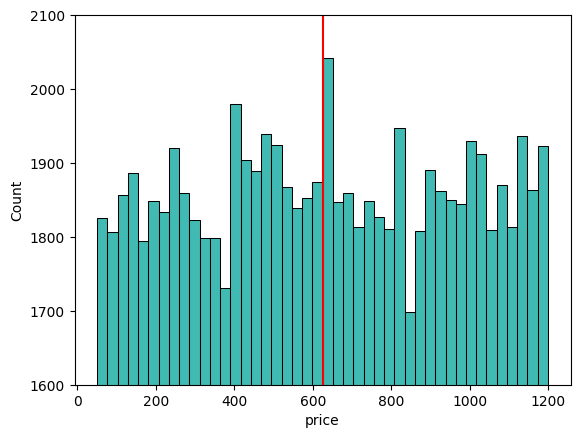

In [75]:
# Price distribution
sns.histplot(x= df['price'], color= '#00A399')
plt.ylim([1600, 2100])
plt.axvline(df['price'].mean(), color = 'red') # Red line indicating the mean price
plt.show()

After analyzing this visualization we can see that we have three sections, we can categorized each, first we have a **Low price** category that has a range between from 50 USD to 350 USD approx, then there is a **Middle price** category that is actually the one with more counts, and the one closer to the average price, its range goes around 400 USD to 850 USD. The **High price** is the last category that has more counts than the lower price category and its range is around 900 USD to 1200 USD.


Keeping in mind this distribution of the prices do not consider any other factor that could indicate the reason for the price, we don't know the minimum nights, or room type or its location, we will have a closer look later.


Here you can have a look at more statistical values from the **price** column.

In [76]:
# summary from the "price" column
price = df['price']
price.describe()

count    81856.000000
mean       626.460980
std        331.687755
min         50.000000
25%        341.000000
50%        626.000000
75%        914.250000
max       1200.000000
Name: price, dtype: float64

# 2 room type distribution
We want to visualize the number of room types available in this dataset, this could give us some hints of which room type has a higher demand. First we need to filter our dataset to count our values.

In [77]:
# Capacity distribution / room type distribution
room_type = df['room type'].value_counts().to_frame()

# Reset index
room_type.reset_index(inplace=True)

# Rename the columns
room_type.columns = ['room type', 'count']

# Gruop data by room type and calculate count for each category
room_type_counts = room_type['count'].groupby(room_type['room type']).sum()

room_type

,room type,count
0,Entire home/apt,43250
1,Private room,36862
2,Shared room,1633
3,Hotel room,111


We can see that the majority of rooms are `Entire home/apt` followed by `Private rooms` and `Shared rooms` and `Hotel rooms` are less common.


But lets visualize how these look in a donut chart with percentages.

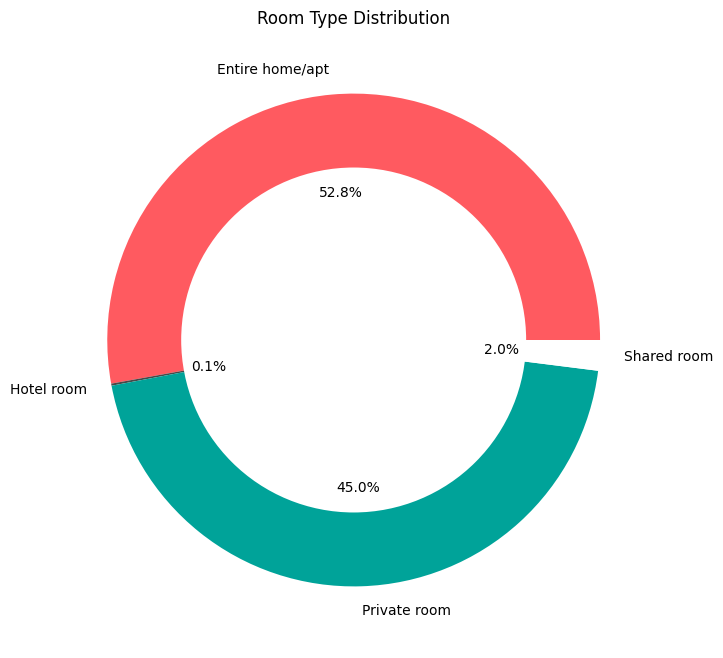

In [78]:
room_type_counts = room_type['count'].groupby(room_type['room type']).sum()

# Create a pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', colors=['#FF5A60', '#484848', '#00A399', '#FFFFFF'])
plt.title('Room Type Distribution')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show plot
plt.show()

Now we have a better view of the room type distribution, with more than half of the rooms available are entire homes or apartments, this offers the clients more privacy if they are traveling in a family group or a big group of people. Just 2 percent of the rooms are shared rooms and just .1 are hotel rooms, these could make sense knowing that Airbnb is a direct competitor with the hotel industry.

## 3 Price by location
For the next objective we want to compare the listing of prices across different neighborhood groups, using a boxplot we are going to be able to see the minimums and maximums prices on each group, we want to answer the next questions:


* Are there significant price differences between neighborhoods?
* Are there outliers in specific locations?


First lets filter or data and get the mean price for each `neighborhood group`

In [79]:
# Price by location
Price_by_location = df.groupby('neighbourhood group').agg({'price': ['mean']}).round(2)

# Reset index
Price_by_location.reset_index(inplace=True)

# Rename columns
Price_by_location.columns = ['neighbourhood group', 'mean price']

Price_by_location

,neighbourhood group,mean price
0,Bronx,630.11
1,Brooklyn,627.34
2,Manhattan,624.37
3,Queens,629.83
4,Staten Island,621.17


First thing we can see is that there is a minimum difference in the mean price.

Text(0, 0.5, 'Price $')

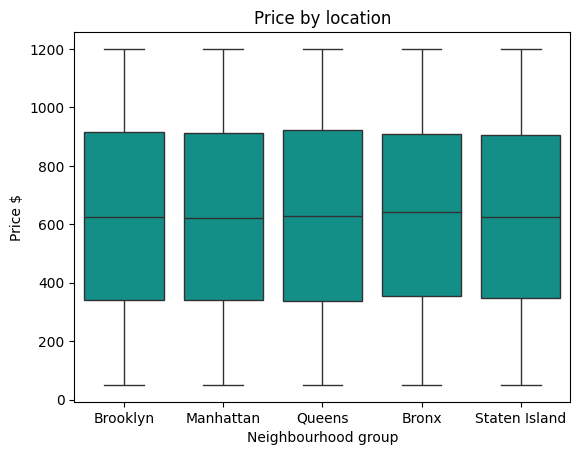

In [80]:
# Price by location
sns.boxplot(y= df['price'], x= df['neighbourhood group'], color= '#00A399')
plt.title('Price by location')
plt.xlabel('Neighbourhood group')
plt.ylabel('Price $')

This is how the table above is visualized in a box plot, as we saw before we can barely see difference in this prices, Something that we need to keep in mind is that there are different host that have a minimum night required for someone to book the place, After making some online research I found that NYC government has changed their policy for short term rentals, you can see it here: [Airbnb, New York host rules](https://www.airbnb.co.cr/help/article/868?_set_bev_on_new_domain=1712701672_YTllZWRkOGFhYzRl). So after reading this article, the new regulations state that the minimum nights allowed are 30 days. Short term stays are still allowed for hosts that are verified by the OSE (Office of Special Enforcement) with a class B status.


This is the average price without minimum nights or the overall average price.

In [81]:
#avg price
df['price'].mean().round(2)

626.46

Now that we know the new regulations we will see how the distribution changes with 30 day minimum nights stay.

In [82]:
df2 = df[df['minimum nights'] > 30]

Text(0, 0.5, 'Price $')

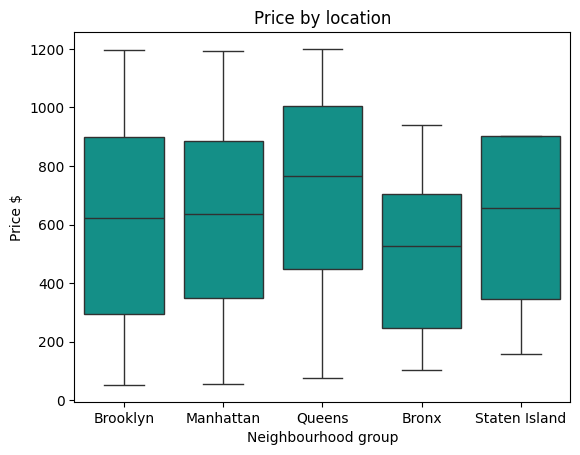

In [83]:
sns.boxplot(y= df2['price'], x= df2['neighbourhood group'], color= '#00A399')
plt.title('Price by location')
plt.xlabel('Neighbourhood group')
plt.ylabel('Price $')

With the new minimum nights established, we can see that the prices varies depending of the neighborhood group, we can see that **Queens** is the group with higher prices followed by **Brooklyn**. this is how they are distributed:


* **Queens**
* **Brooklyn**
* **Manhattan**
* **Bronx**
* **Staten Island**


Some observations are that the average price varies depending the location, we can also see that **Staten Island** have minimum hosts that satisfy the requirements for minimum nights.

## 4 Host identity vs review rate
Usually when we are looking for something online whether is to buy or in this case to book a place for a holiday trip. This is why I want to look up for a relationship between a `Verified host` or `Unverified host` with their online reviews. 

In [84]:
# rate review count by host_identity_verified
df['host_identity_verified'].value_counts().to_frame()

,count
host_identity_verified,
unconfirmed,40947
verified,40909


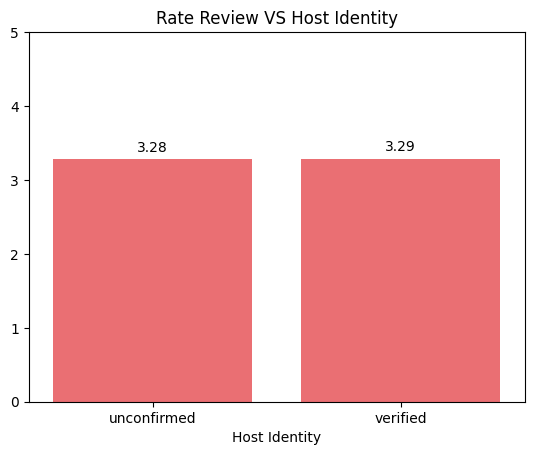

In [85]:
# calculate the mean review rate 
mean_review_rate = df.groupby('host_identity_verified')['review rate number'].mean()

# create the bar plot
sns.barplot(x= df['host_identity_verified'], y= df['review rate number'].mean(), color='#FF5A60')
plt.ylim([0, 5])
plt.xlabel('Host Identity')
plt.title('Rate Review VS Host Identity')

for i, mean_rate in enumerate(mean_review_rate):
    plt.text(i, mean_rate + 0.1, f'{mean_rate:.2f}', ha='center')
    
plt.show()

This visualization makes it very clear that there are no relations if a host is verified or not.

## 5 price vs number of nights
After we analyzed the listing of prices in the different neighborhood groups, we saw that there is a minimum of 30 nights allowed and there is a restriction for short term stays in NYC. So now we will compare the price with the minimum nights to see if there is a relationship and answer some questions:


* Does the price generally increase for short term reservations?
* Is there a strong correlation or a weaker association?

Text(0.5, 0, 'price $')

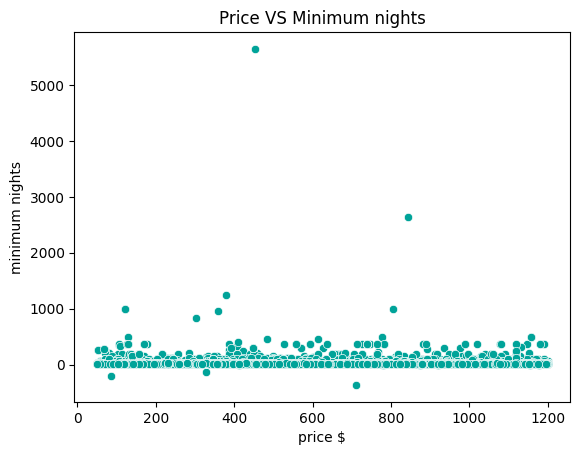

In [86]:
# Scatter plot
sns.scatterplot(x= df['price'], y= df['minimum nights'], color= '#00A399')
plt.title('Price VS Minimum nights')
plt.xlabel('price $')

After looking at this visualization it is very hard to interpret the data due to outliers present in the data, this outliers weren't considered in the data exploration phase, some of the outliers are that there are hosts with more than `five thousand` minimum nights.


Another thing to consider is that we have a large group of data points which makes it more difficult to understand the visualization.


Once we identified this we will approach this situation by:
* Identify and replace the outliers with the mean minimum nights.
* Make a random sample of the data to improve the visualization.


Let's identify the outliers first:


In [87]:
# Max minimum nights
df['minimum nights'].max()

5645.0

In [88]:
# Filter the minimum nights column higher than 1000
df[df['minimum nights'] > 500]

,id,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
5768,4187002,62526606377,verified,Genevieve,Manhattan,Greenwich Village,US,False,moderate,Entire home/apt,2008,379.0,76.0,1250.0,2.0,0.03,2.0,1.0,26.0
13405,8404918,43219664735,verified,Glenn H.,Manhattan,Harlem,US,False,moderate,Entire home/apt,2016,805.0,161.0,999.0,2.0,0.07,3.0,1.0,137.0
26342,15550023,21129170893,unconfirmed,Angie,Brooklyn,Williamsburg,US,False,moderate,Private room,2009,121.0,24.0,999.0,24.0,1.12,3.0,6.0,249.0
42369,24401735,7625316716,unconfirmed,Shai,Manhattan,Upper East Side,US,False,moderate,Private room,2016,360.0,72.0,954.0,1.0,0.25,3.0,1.0,8.0
42398,24417751,29378706293,verified,Elena,Brooklyn,Bushwick,US,True,flexible,Private room,2013,453.0,91.0,5645.0,1.0,0.88,4.0,1.0,0.0
42407,24422722,83669529485,unconfirmed,Gk,Brooklyn,Bay Ridge,US,False,moderate,Entire home/apt,2022,843.0,169.0,2645.0,14.0,3.59,3.0,1.0,271.0
83506,47121700,7893972218,unconfirmed,Angie,Brooklyn,Williamsburg,US,True,strict,Private room,2009,121.0,24.0,999.0,24.0,1.12,3.0,6.0,249.0
99691,56060675,58644006496,unconfirmed,Sasha,Manhattan,Harlem,US,False,moderate,Entire home/apt,2015,303.0,61.0,825.0,23.0,0.72,2.0,1.0,5.0


Once we identify the outliers present in this column, we will replace this by calculating the mean and the standard variation.

In [89]:
# calculate mean and std
mean_df = df['minimum nights'].mean()
std_df = df['minimum nights'].std()

# threshold
threshold = 3

# indentify outliers
outliers = (df['minimum nights'] - mean_df).abs() > threshold * std_df

# replace outliers
df.loc[outliers, 'minimum nights'] = mean_df

df.head()

,id,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,US,False,strict,Private room,2020,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,US,False,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,US,True,moderate,Entire home/apt,2005,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,US,False,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
7,1005202,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,US,False,moderate,Private room,2009,1060.0,212.0,45.0,49.0,0.40,5.0,1.0,219.0


In [90]:
df['minimum nights'].max()

91.0

Now we can see that the max value in the column is `91` a number that's easier to handle, now it's time to sample our data, for this we will be randomly picking 500 data points.

In [91]:
# sample size
sample = df.sample(n=500, replace= True)
#frac=0.1

Text(0.5, 0, 'price $')

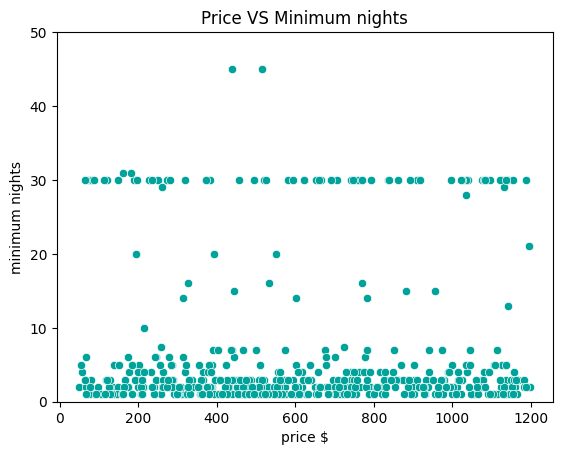

In [92]:
# scatter plot
sns.scatterplot(x= sample['price'], y= sample['minimum nights'], color= '#00A399')
plt.ylim([0, 50])
plt.title('Price VS Minimum nights')
plt.xlabel('price $')

Now we can have a better understanding of our data, First we can see that our data is distributed in two sections, the majority of host are below the 10 minimum night range, which means that these could be class B host that can host short term booking (this stays as a hypothesis, because there is no way to check if this is applying on this dataset), then we have a big group of host that have a 30 minimum night requirement, these two groups have a variety of price range, which means that there are different options for users. Lets answer our questions for this objective:


##### **Does the price increase for short term reservations?**
The answer is No, we can find similar prices for both short and long term reservations, this indicates that there are no relation between the price and minimum nights.


##### **Is there a strong correlation or a weak association?**
We can say that there does not appear to be a strong linear correlation, there is no clear trend of going up or down as the minimum nights changes, instead there is likely to have a weak association.


Let's calculate the correlation coefficient of our sample, if this value is closer to 0 indicates a weak association.

In [93]:
# Correlation coeficient
price_minimumnights = df['price'].corr(df['minimum nights'])
price_minimumnights

-0.000882802591582964

# Conclusion
As a conclusion, the analysis developed in these project showed key insights found in te airbnb NYC dataset, applying the correct data analysis process, like data wrangling,data cleaning, exploratory data analysis and visualizations, improved data completeness and reduce data inconsistencies to provide a detailed analysis to complete the established objectives. 
Some insights gained in this analysis like the price distribution to understand the price range in the city, or finding the room type distribution to comprehend what's commonly offered to users, also compared prices with their neighborhood groups, also compared if a verified host would have a higher review rate,this data could be used by host to use better marketing strategies to attract more guests, finally looked for relationships between price and minimum nights term using methods like data sampling and replacing outliers with aggregated values. Lastly, displaying the data by using the correct visualizations to understand and comprehend our findings.

### **Dataset Link**
[Airbnb open data](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data)